# VAR/SVAR 模型相關程式

### 簡要Summary

* 編號：v5i2l4

1. 5個變數：隔夜拆款利率、情緒指數、許可建照數、消費者購屋貸款、房價指數

2. Lag = 4

3. normal seed 170734

$$
\left[
\begin{array}{c}
	\varepsilon_t^i\\
    \varepsilon_t^{sentiment}\\
	\varepsilon_t^{permit}\\
	\varepsilon_t^{loan}\\
	\varepsilon_t^{hp}
\end{array}
\right]
=
\left[
\begin{array}{ccccc}
a_{11} &0 &0 &0 &0\\
a_{21} &a_{22} &0 &0 &0\\
a_{31} &a_{32} &a_{33} &0 &0\\
a_{41} &a_{42} &0 &a_{44} &a_{45}\\
a_{51} &a_{52} &a_{53} &a_{54} &a_{55}
\end{array}
\right]
\left[
\begin{array}{c}
	e_t^{mp}\\
    e_t^{expectation}\\
	e_t^{hs}\\
	e_t^{hd}\\
	e_t^{sp}
\end{array}
\right]
$$

### 環境設定

In [1]:
getwd()

[1] "/Users/Andy 1/Google 雲端硬碟 (r08323004@g.ntu.edu.tw)/0 Semesters/Thesis/6_VAR_model/R/seeds/2021-01-29/v5i2l4"

In [2]:
# 設定路徑
#Path = "/Users/Andy 1/Google 雲端硬碟 (r08323004@g.ntu.edu.tw)/0 Semesters/Thesis/6_VAR_model/R"
#setwd(Path)
source("code/VAR_functions.R")           # 讀取 VARsource.R 檔

inv_tol = 1e-20 #求反矩陣時做數值運算允許的最小誤差(避免singular matrix)
#inv_tol = 1e-22

─ Attaching packages ──────────────────── tidyverse 1.3.0 ─

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: matrixcalc

Loading required package: lattice

Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘pack

In [3]:
options(warn=-1)
#options(warn=-1)    # 關掉warning
options(scipen=999) #不要科學記號

### 讀資料

In [4]:
###### 讀取資料 ######
file = "data/df.csv"
data = read.csv(file = file, header = TRUE)
data = na.omit(data)
# 5-variable model
By <- data %>% select(interest_rate, Sentiment, permit, loan, hp) %>% as.matrix
# 按照老師建議的將情緒指標擺在第二個的identification

### 模型設定

In [5]:
#----- 模型設定 -----#
VAR.P = 2                       # 最大的落後項數
CONST = TRUE                    # 是否有常數項
Y     = VAR.Y(By, VAR.P)        # 設定 Y
X     = VAR.X(By, VAR.P)        # 設定 X

## Reduced Form VAR

In [6]:
###### 參數估計 ######
(Coef.OLS    = VAR.OLS(Y, X, CONST)                  )
(Sigma.OLS   = VAR.Sigma.OLS(Y, X, Coef.OLS, CONST)  )
(Sigma.MLE   = VAR.Sigma.MLE(Y, X, Coef.OLS, CONST))

0.722058306,16.1278619,-0.0000077344149,0.000000277829897,0.00115407408,0.192222893,5.9359668,-0.000007395526,-0.000000363082461,0.00325782519,0.04130478
-0.001503781,0.6282233,0.0000003946027,0.000000008809227,-0.00007606962,0.001107574,-0.1146121,0.000000117841,-0.000000008071463,0.00002357842,0.00437145
406.930007871,35859.9555541,0.6041224972877,-0.000687786593178,60.18088222395,-626.672038325,-34545.4403101,0.257607672938,0.000415937819115,-50.08258361160,3159.17262728
13805.983050877,3512646.8905656,12.1399842546307,1.623707737351168,930.14846055896,-18184.914874449,-2128914.0580199,-8.019444910185,-0.621095069327055,-988.58868181426,-1386.72599506
-0.476922612,65.0077335,0.0001058876296,-0.000002792079375,1.27415504650,-0.135157323,-152.3861634,0.000369176349,0.000003365392898,-0.31222660761,0.54451478


0.2069104800,0.00038324280,7.009556,2700.39882,0.014924823
0.0003832428,0.00002686865,1.109099,25.08306,0.008086113
7.0095563051,1.10909919865,1237954.623902,8541160.74626,1145.978383741
2700.3988195914,25.08305540896,8541160.746259,5136722121.20922,-4208.777428270
0.0149248230,0.00808611312,1145.978384,-4208.77743,12.699964384


0.1874573580,0.00034721142,6.350538,2446.51517,0.01352163
0.0003472114,0.00002434254,1.004825,22.72482,0.00732588
6.3505381909,1.00482491501,1121565.727638,7738145.63336,1038.23682630
2446.5151698863,22.72481943034,7738145.633363,4653782434.59981,-3813.08040510
0.0135216345,0.00732588026,1038.236826,-3813.08041,11.50595064


### AIC/SIC

In [7]:
#----- 資訊準則 -----#
A0.Mat = matrix(1, 3, 7)
(SIC = VAR.IC(Sigma.MLE, A0.Mat, T)$SIC              )

(IC = VAR.Select(By, Max.lag = 4, CONST)             )
apply(IC, 1, which.min)

[1] 25.97448

AIC,27.54207,26.91465,26.91336,26.83078
SIC,28.24648,28.21311,28.81238,29.33702
HQ,27.82808,27.44181,27.68425,27.84805


AIC SIC  HQ 
  4   2   2

In [8]:
# 設定lag期數
VAR.P <- 4

# SVAR

## Identification

$$
\left[
\begin{array}{c}
	\varepsilon_t^i\\
    \varepsilon_t^{sentiment}\\
	\varepsilon_t^{permit}\\
	\varepsilon_t^{loan}\\
	\varepsilon_t^{hp}
\end{array}
\right]
=
\left[
\begin{array}{ccccc}
a_{11} &0 &0 &0 &0\\
a_{21} &a_{22} &0 &0 &0\\
a_{31} &a_{32} &a_{33} &0 &0\\
a_{41} &a_{42} &0 &a_{44} &a_{45}\\
a_{51} &a_{52} &a_{53} &a_{54} &a_{55}
\end{array}
\right]
\left[
\begin{array}{c}
	e_t^{mp}\\
    e_t^{expectation}\\
	e_t^{hs}\\
	e_t^{hd}\\
	e_t^{sp}
\end{array}
\right]
$$

In [9]:
### 5-variable model
# 如果不是Wold遞迴式 -> 自定義
Amat = diag(5)
Amat[2,1]  = NA;
Amat[3,1]  = NA; Amat[3,2]  = NA;
Amat[4,1]  = NA; Amat[4,2]  = NA; Amat[4,5]  = NA;
Amat[5,1]  = NA; Amat[5,2]  = NA; Amat[5,3]  = NA; Amat[5,4]  = NA;

Bmat = diag(5)
diag(Bmat) = NA

Amat;Bmat

1,0,0,0,0
NA,1,0,0,0
NA,NA,1,0,0
NA,NA,0,1,NA
NA,NA,NA,NA,1


NA,0,0,0,0
0,NA,0,0,0
0,0,NA,0,0
0,0,0,NA,0
0,0,0,0,NA


## 估計 $\hat{A} , \hat{B}$

### 1. 找起始值

為了得到合理的估計，在設定完認定條件後，依以下步驟蒐集seeds:

1. 給定一個seed，估 $\hat{A} , \hat{B}$ ，從normal或uniform隨機assign起始值

2. 如果 $se(\hat{A}), se(\hat{B})$ 存在，進入下一步，若否則回到第一步

3. 如果標準誤都小於2500，則存下這個seed

4. 直到存的seed總數大於100則迴圈終止

```R
### Brutal Force
seed_stored <- c()
seed_counter <- 0
i <- 63588
while(TRUE){
    i <- i+1
    set.seed(i)
    SVAR_AB_est <- try(VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "normal"), 
                     silent = TRUE)
    
    if(class(SVAR_AB_est)=="try-error"){
        next
    }else{
        A0.Std <- SVAR_AB_est$A0.Std
        B0.Std <- SVAR_AB_est$B0.Std
    }
        
    if(sum(is.na(A0.Std))==0 && sum(is.na(B0.Std))==0){
        seed_stored <- rbind(seed_stored, i)
        cat("Seed: ", i, " found\n")
        write.csv(seed_stored, "seedv5i2-norm.csv")
        
        # 把Variance Decomp的table畫出來
        SVAR_AB_IRF <- VAR.svarirf.AB(By, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)
        SVAR_AB_VarDecomp <- VAR.svardecomp.AB(m = 5, By, VAR.P,
                                         AMat, BMat, h=119,
                                         Const=TRUE, ddTheta = SVAR_AB_IRF)
          if(sum((SVAR_AB_VarDecomp*100)>90)>0){ #如果變異數分解的情況夠好就印出來
              next
          }else{
              cat("Now in seed: ", file = "output_v5i2.txt",append = T);
              cat(i, file = "output_v5i2.txt", append = T)
              cat("\n\n", file = "output_v5i2.txt", append = T)
              cat(SVAR_AB_VarDecomp*100, file = "output_v5i2.txt", append = T)
              cat("\n\n", file = "output_v5i2.txt", append = T)
              seed_counter <- seed_counter+1
  }
    }
    if(seed_counter>=1000){
        break
  }
#   cat("Now in teration: ", i, "\n",
#       "There are ", length(seed_stored), " seeds found", "\n")
}
```

### 2. 比標準誤大小

以下的程式可以從上面存下的seeds中計算出每個seed對應的 $\hat{A}, \hat{B}$ 的標準誤大小

### 3. 從變異數分解看Possible Seed

但標準誤小不見得就可以有好的估計的結果

下面的程式可以從已存下的seeds一個個輸出變異數分解的結果至一個純文字檔中

# 找到的seed

從normal(0,1)抽出的好的seed:

170734, 159711

In [10]:
set.seed(170734)
rnorm(15)

[1] -0.0101069879 -0.4558389517  0.0006784081 -1.5776172544 -1.0151326665
 [6]  0.3408230454 -2.2772287957 -1.4950319411  1.7001623884 -1.4257192232
[11]  0.5840424147 -0.8826957042 -0.0848404749  0.5983958582 -0.3828122099

In [11]:
set.seed(159711)
rnorm(15)

[1] -0.0410721094 -0.7698147125  0.2010168572 -0.0042166624 -0.3870466884
 [6] -0.1644198322  1.4600267253 -0.0779173472  1.7846298721  1.0811239763
[11]  0.4054117987  0.6785294193  1.7351861997  0.0001699576 -0.6433081111

In [11]:
set.seed(170734)
SVAR_AB_est <- VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "normal")
A0 <- SVAR_AB_est$A0.svar
B0 <- SVAR_AB_est$B0.svar
A0.Std <- SVAR_AB_est$A0.Std
B0.Std <- SVAR_AB_est$B0.Std

## A, B Matrix

In [12]:
A0; B0
A0.Std; B0.Std

1.00000000,0.0000000,0.00000000,0.00000000,0.00
-0.00230041,1.0000000,0.00000000,0.00000000,0.00
-540.59565255,-97.8878464,1.00000000,0.00000000,0.00
-5847.62755000,-72.9785479,0.00000000,1.00000000,-5265.75
-49.53169179,0.4217059,-0.09555819,0.01617323,1.00


0.5100613,0.000000000,0.0000,0.00,0.000
0.0000000,0.005398892,0.0000,0.00,0.000
0.0000000,0.000000000,684.5701,0.00,0.000
0.0000000,0.000000000,0.0000,32753.98,0.000
0.0000000,0.000000000,0.0000,0.00,1107.496


0.000000000,0.000,0.0000000,0.00000000,0.0000
0.001220912,0.000,0.0000000,0.00000000,0.0000
159.678556982,5814.933,0.0000000,0.00000000,0.0000
2974.266340911,6858.030,0.0000000,0.00000000,456.6655
254.197087511,6843.324,0.1270736,0.00882226,0.0000


0.04852301,0.0000000000,0.00000,0.000,0.0000
0.00000000,0.0003165993,0.00000,0.000,0.0000
0.00000000,0.0000000000,28.03507,0.000,0.0000
0.00000000,0.0000000000,0.00000,1220.657,0.0000
0.00000000,0.0000000000,0.00000,0.000,600.9584


## IRF (without Bootstrap C.I.)

In [13]:
### IRF
SVAR_AB_IRF <- VAR.svarirf.AB(By, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)


# 5*5個圖的time series
df_IRF_plot <- matrix(NA, 120, 25) #%>% as.tibble()
#dim(df_IRF_plot)
h <- 0 # h表示第幾期的IRF
for(period in SVAR_AB_IRF){
  k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
  h <- h+1 # h表示第幾期的IRF
  for(j in 1:5){
    for(i in 1:5){
      k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
      df_IRF_plot[h,k] <- period[i,j]
    }
  }
}
df_IRF_plot <- df_IRF_plot %>% as_tibble()

In [14]:
p1 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V1))
p2 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V2))
p3 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V3))
p4 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V4))
p5 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V5))
p6 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V6))
p7 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V7))
p8 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V8))
p9 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V9))
p10 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V10))
p11 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V11))
p12 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V12))
p13 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V13))
p14 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V14))
p15 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V15))
p16 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V16))
p17 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V17))
p18 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V18))
p19 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V19))
p20 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V20))
p21 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V21))
p22 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V22))
p23 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V23))
p24 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V24))
p25 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V25))

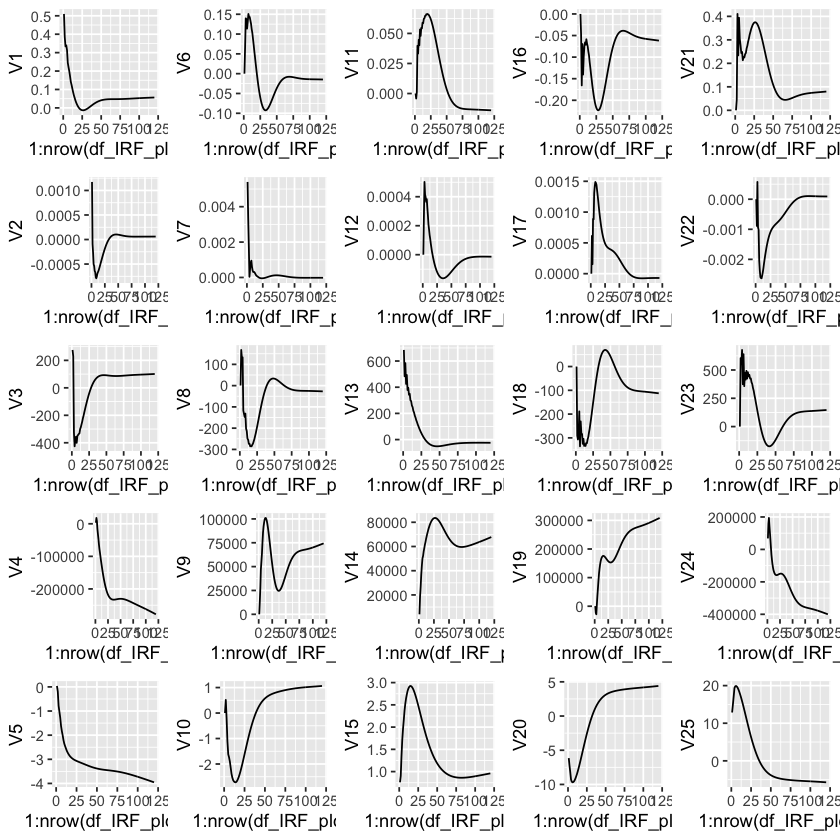

In [15]:
multiplot(p1,p2,p3,p4,p5,
          p6,p7,p8,p9,p10,
          p11,p12,p13,p14,p15,
          p16,p17,p18,p19,p20,
          p21,p22,p23,p24,p25,
          cols = 5)

```R
# For shock 1
multiplot(p1,p2,p3,p4,p5,
          cols = 2)
# For shock 2
multiplot(p6,p7,p8,p9,p10,
          cols = 2)
# For shock 3
multiplot(p11,p12,p13,p14,p15,
          cols = 2)
# For shock 4
multiplot(p16,p17,p18,p19,p20,
          cols = 2)
# For shock 5
multiplot(p21,p22,p23,p24,p25,
          cols = 2)
```

## IRF (Bootstrap C.I.)

Steps:

1. 從殘差取後放回重抽T個

2. 從估計值加上重抽的T個殘差，得到5條 period為T的pseudo time series

3. 從pseudo time series再估SVAR及IRF

    a. 估的時候是固定已經得到的 $\hat{A}, \hat{B}$ matrix來計算IRF
    
    b. 估的條件相似，是當重抽一組residual並得到pseudo time series後，一樣要 $se(\hat{A}), se(\hat{B})$ 存在才算進一個bootstrap statistics
    
    c. 停止條件是蒐集到1000條

4. 從IRF的2.5% quantile跟97.5%quantile找到IRF的95% C.I.

存法：用arrary：

1. row數為總期間減去lag期數

2. column數為變數總數的平方（shock1對y1,..., shock5對y5）

3. page數為Bootstrap重複的次數

```R
lower = 0.025                                        # 控制成 95% CI
upper = 1-lower
kk = ncol(By)
ddY = VAR.ddY(By, VAR.P)
ddX = VAR.ddX(By, VAR.P)
# obs:119 lag:2 -> 117
# Y: 5 vairables
# X: 5個變數的t-1, t-2 -> 10 variables
dim(ddY); dim(ddX)

T   = nrow(ddY)
T.total= nrow(By)
Ik  = diag(rep(1, kk))
# 55 coef.
Coef = t(VAR.EbyE(ddY, ddX, CONST)$ddA)              # Step 1 估計模型
# residuals
U    = VAR.EbyE(ddY, ddX, CONST)$ddU

#BSigma.u = VAR.ddSigma.OLS(ddY, ddX, CONST)
if(CONST == TRUE){
  const = Coef[, ncol(Coef)]
  Coef.noc= Coef[,-ncol(Coef)]                      # 刪掉 const
}else{
  const = matrix(0, kk, 1)
  Coef.noc = Coef
}
dm.U <- U-mean(U)
#dm.U = scale(U, scale = FALSE)                       # Step 2 減去殘差的平均數
N = 1000 #重抽次數
dim(ddX); dim(Coef.noc); dim(dm.U)
#Y.sim <- matrix(const, nrow = 117, ncol = 5, byrow = T) + ddX %*% t(Coef.noc) + dm.U

# 存N次重抽的IRF
df_IRF.sim <- array(NA, c(120,25,N)) #dimensions are: Time Period, Number of shock interacts with variables, page (number of Bootstrap resamplings)
counter <- 1
while(TRUE){
  rm(Y.sim); rm(SVAR_AB_est.sim)
  cat("Now, there are ", counter-1, " sets of resamples.\n")
  Y.sim = matrix(0, nrow = T.total, ncol = kk)          # Y.sim = 0 #pseudo time series
  Y.sim[c(1:VAR.P),] = By[c(1:VAR.P), ]
  boot.number = sample(c(1:T), replace = TRUE)      # Step 3 取出放回
  U.sim = dm.U[boot.number,]
  
  Y.sim[-c(1:VAR.P),] <- matrix(const, nrow = 119-VAR.P, ncol = 5, byrow = T) + ddX %*% t(Coef.noc) + U.sim
  #`Y.sim` is the pseudo time series
  # Step 5 重新估算SVAR
  
  ### SVAR.sim Start ###
  SVAR_AB_est.sim <- try(VAR.svarest.AB(Y.sim, VAR.P, Amat, Bmat, CONST, start = "normal"), silent = T)
  if(class(SVAR_AB_est.sim)=="try-error"){
    print(Y.sim[length(Y.sim)])
    print(U.sim[length(U.sim)])
    print("Bad Trial")
    next
  }
  A0.Std.sim <- try(SVAR_AB_est.sim$A0.Std, silent = T)
  B0.Std.sim <- try(SVAR_AB_est.sim$B0.Std, silent = T)
  cat(class(A0.Std.sim), "\t", class(B0.Std.sim), "\n")
  
  if(class(A0.Std.sim)=="try-error" | class(B0.Std.sim)=="try-error" ){
    cat("This iteration turns out a bad result. Try next.\n")
    next
  }
  
  if(sum(is.na(A0.Std.sim))==0 && sum(is.na(B0.Std.sim))==0){
    #IRF
    SVAR_AB_IRF.sim <- VAR.svarirf.AB(Y.sim, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)#.sim)
    cat("This iteration turns out a proper result. \n
        Estimate its IRF and save.\n")
  }else{
    next
  }
  # SVAR_AB_IRF.sim <- VAR.svarirf.AB(Y.sim, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est.sim)
  # cat("This iteration turns out a proper result. \n
  #     Estimate its IRF and save.\n")
  
  # 5*5個圖的time series
  df_IRF_plot.sim <- matrix(NA, 120, 25) #%>% as.tibble()
  # df_IRF.sim <- array(1:(120*25*N), c(120,25,N))
  # df_IRF.sim[2,1,1] # slicing
  
  h <- 0 # h表示第幾期的IRF
  for(period in SVAR_AB_IRF.sim){
    k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
    h <- h+1 # h表示第幾期的IRF
    for(j in 1:5){
      for(i in 1:5){
        k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
        df_IRF_plot.sim[h,k] <- period[i,j]
      }
    }
  }
  # 把這一次重抽得到的IRF append進`df_IRF.sim`中
  df_IRF.sim[,,counter] <- df_IRF_plot.sim
  ### SVAR.sim Ends ###
  if(counter>=N){
    break
  }
  counter <- counter+1
}
```

```R
# Save
saveRDS(df_IRF.sim, file = "df_IRF.sim_v5i2-norm.rds")
```

In [16]:
df_IRF.sim <- read_rds("df_IRF.sim_v5i2l4.rds")

In [17]:
# 看某一頁
head(df_IRF.sim[,,1000])

0.5100613,0.00117335020,275.85175,3189.4885,0.03926404,0.0000000000000000001049627,0.0053988918,0.5284859,2.95171,0.0004857251,⋯,-0.0000000000000001473636,0.0000000000000009079404,0.0000000000002532081,380.1345,-6.148003,0.000000000000001380366,-0.000000000000002776605,0.0000000000007305912,67682.39,12.85332
0.2175517,-0.00111764330,68.97252,-427.9627,-0.56544420,0.0051203943956210674903762,-0.0010625162,-39.0299132,32436.61506,-2.2206566499,⋯,-0.1062858644937595270497,-0.0006290585089182163187,-332.9032224954276557582,23111.5670,-5.735307,0.276438030692846614667,0.001833433902518358206,696.1549408015583821907,20472.99,12.37580
0.1860987,0.00009497487,-262.26176,4478.3633,-1.71775656,0.0287965845898506406230766,0.0007102528,-207.7354658,23035.13260,-3.5317606030,⋯,-0.0512753086408865021983,0.0019342076806463770044,-179.1364069293086629386,44919.0998,-6.603788,0.138282114693465352229,-0.003889699624210549069,485.1838402875721953933,-14306.65,13.99264
0.1258119,-0.00059484788,-343.59131,-8480.0455,-1.61656356,-0.0245616924317262064203504,0.0005400899,-394.0408164,46412.58774,-3.7823982023,⋯,-0.0676577026066397385629,0.0011114658358803606534,-293.5754505830113316733,81321.6347,-5.970540,0.196741989066751082893,-0.001987458012359994645,623.8326278464508050092,-88810.66,12.93415
0.2432181,0.00020780157,-62.67808,-10039.9781,-1.73759234,0.0681419030569692801835302,0.0008914423,-198.8270427,41947.22857,-3.9966379484,⋯,-0.0153922190311532522400,0.0010253356780871426910,-164.4662683298473098148,94090.0837,-6.589314,0.059028236638239278689,-0.002043827368144041957,341.8984066566194996994,-114008.77,14.03377
0.1819433,-0.00036524323,-230.25239,-7490.8540,-1.74549730,0.0061769090254038382797885,0.0001063666,-315.9363850,54886.10401,-4.4992964914,⋯,-0.0733089044769097419874,0.0007053354094286749592,-362.2036160506009991877,106730.0608,-6.491469,0.195632240137100399391,-0.001340038824571439767,728.6716372266972712168,-140821.81,13.87238


### 畫IRF & Bootstrap C.I.

In [18]:
df_IRF_plot.BS.L <- matrix(NA, 120, 25)
df_IRF_plot.BS.U <- matrix(NA, 120, 25)
df_IRF_plot.BS.Median <- matrix(NA, 120, 25)
df_IRF_plot.BS.Mean <- matrix(NA, 120, 25)
for(col in 1:25){
  for(row in 1:120){
    df_IRF_plot.BS.L[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.025)
    df_IRF_plot.BS.U[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.975)
    df_IRF_plot.BS.Median[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.5)
    df_IRF_plot.BS.Mean[row,col] <- mean(df_IRF.sim[row,col,])
  }
}

df_IRF_plot.BS.L <- df_IRF_plot.BS.L %>% as_tibble()
df_IRF_plot.BS.U <- df_IRF_plot.BS.U %>% as_tibble()
df_IRF_plot.BS.Median <- df_IRF_plot.BS.Median %>% as_tibble()
df_IRF_plot.BS.Mean <- df_IRF_plot.BS.Mean %>% as_tibble()

In [19]:
ind <- 0
for(i in 1:5){
  for(j in 1:5){
    ind <- ind+1
    nam <- paste("shock", j, "y", i, sep = '')
    assign(nam, bind_cols(df_IRF_plot.BS.L[ind], df_IRF_plot.BS.U[ind],
                          df_IRF_plot.BS.Median[ind], df_IRF_plot.BS.Mean[ind]))
    # 改名
    evalStr <- paste0("colnames(", nam, ") <- c('Lower', 'Upper', 'Median', 'Mean')")
    eval(parse(text=evalStr))
    # 圖層
    evalStr <- paste0("p", ind, " <- ", "ggplot(",nam,") + geom_line(aes(x = 1:nrow(", nam, "), y = Lower), linetype = 'dashed', col='black')+geom_line(aes(x = 1:nrow(", nam, "), y = Upper), linetype = 'dashed', col='black')+geom_line(aes(x = 1:nrow(", nam, "), y = Mean), col = 'Blue')")
    eval(parse(text=evalStr))
  }
}

New names:
* V1 -> V1...1
* V1 -> V1...2
* V1 -> V1...3
* V1 -> V1...4

New names:
* V2 -> V2...1
* V2 -> V2...2
* V2 -> V2...3
* V2 -> V2...4

New names:
* V3 -> V3...1
* V3 -> V3...2
* V3 -> V3...3
* V3 -> V3...4

New names:
* V4 -> V4...1
* V4 -> V4...2
* V4 -> V4...3
* V4 -> V4...4

New names:
* V5 -> V5...1
* V5 -> V5...2
* V5 -> V5...3
* V5 -> V5...4

New names:
* V6 -> V6...1
* V6 -> V6...2
* V6 -> V6...3
* V6 -> V6...4

New names:
* V7 -> V7...1
* V7 -> V7...2
* V7 -> V7...3
* V7 -> V7...4

New names:
* V8 -> V8...1
* V8 -> V8...2
* V8 -> V8...3
* V8 -> V8...4

New names:
* V9 -> V9...1
* V9 -> V9...2
* V9 -> V9...3
* V9 -> V9...4

New names:
* V10 -> V10...1
* V10 -> V10...2
* V10 -> V10...3
* V10 -> V10...4

New names:
* V11 -> V11...1
* V11 -> V11...2
* V11 -> V11...3
* V11 -> V11...4

New names:
* V12 -> V12...1
* V12 -> V12...2
* V12 -> V12...3
* V12 -> V12...4

New names:
* V13 -> V13...1
* V13 -> V13...2
* V13 -> V13...3
* V13 -> V13...4

New names:
* V14 -> V14...1
* V1

In [20]:
Text_Size_Theme = theme(
  axis.title.x = element_text(size = 12),
  axis.text.x = element_text(size = 12),
  axis.title.y = element_text(size = 12),
  axis.title = element_text(size = 12),
  plot.title = element_text(size=12))

## shock1: mp
p1 <- p1+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Monetary Policy Shock')+Text_Size_Theme
p2 <- p2+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Monetary Policy Shock')+Text_Size_Theme
p3 <- p3+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Monetary Policy Shock')+Text_Size_Theme
p4 <- p4+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Monetary Policy Shock')+Text_Size_Theme
p5 <- p5+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Monetary Policy Shock')+Text_Size_Theme

## shock2: price expectation
p6 <- p6+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Price Expectation Shock')+Text_Size_Theme
p7 <- p7+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Housing Price Expectation Shock')+Text_Size_Theme
p8 <- p8+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Price Expectation Shock')+Text_Size_Theme
p9 <- p9+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Price Expectation Shock')+Text_Size_Theme
p10 <- p10+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Price Expectation Shock')+Text_Size_Theme

## shock3: supply shock
p11 <- p11+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Supply Shock')+Text_Size_Theme
p12 <- p12+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Housing Supply Shock')+Text_Size_Theme
p13 <- p13+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Supply Shock')+Text_Size_Theme
p14 <- p14+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Supply Shock')+Text_Size_Theme
p15 <- p15+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Supply Shock')+Text_Size_Theme


## shock4: demand shock
p16 <- p16+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Demand Shock')+Text_Size_Theme
p17 <- p17+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Housing Demand Shock')+Text_Size_Theme
p18 <- p18+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Demand Shock')+Text_Size_Theme
p19 <- p19+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Demand Shock')+Text_Size_Theme
p20 <- p20+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Demand Shock')+Text_Size_Theme

## shock5: sp
p21 <- p21+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Speculation Shock')+Text_Size_Theme
p22 <- p22+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Housing Speculation Shock')+Text_Size_Theme
p23 <- p23+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Speculation Shock')+Text_Size_Theme
p24 <- p24+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Speculation Shock')+Text_Size_Theme
p25 <- p25+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Speculation Shock')+Text_Size_Theme

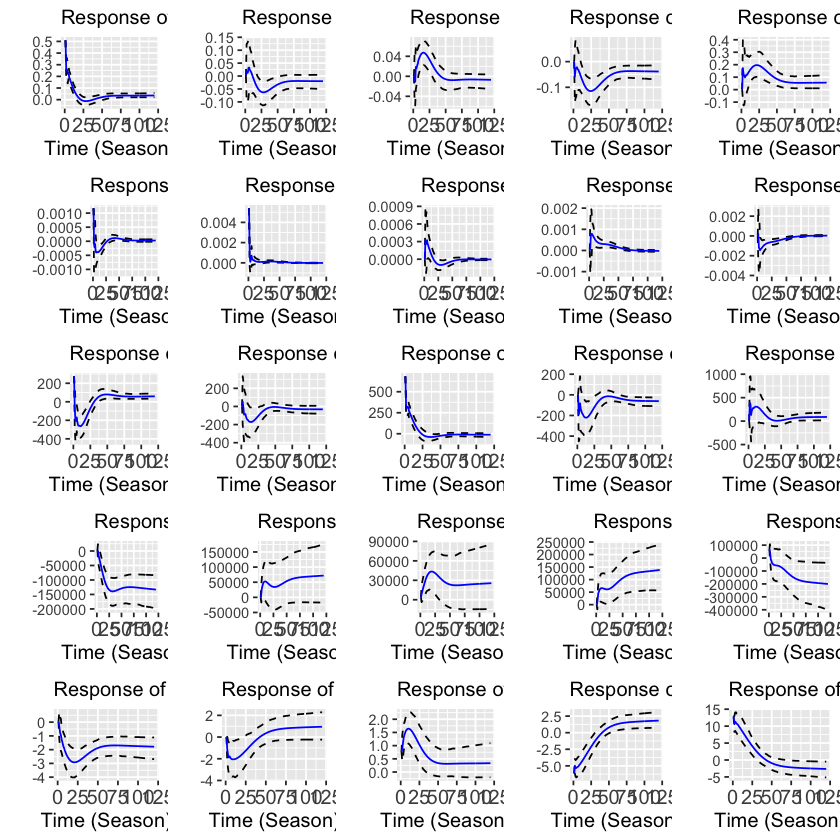

In [21]:
multiplot(p1,p2,p3,p4,p5,
          p6,p7,p8,p9,p10,
          p11,p12,p13,p14,p15,
          p16,p17,p18,p19,p20,
          p21,p22,p23,p24,p25,
          cols = 5)

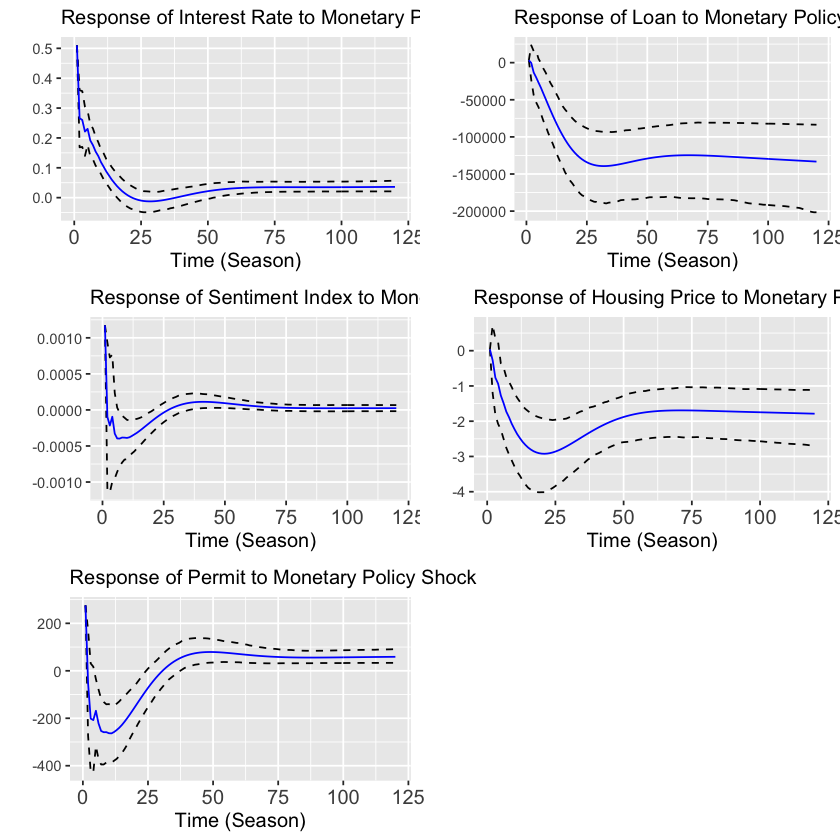

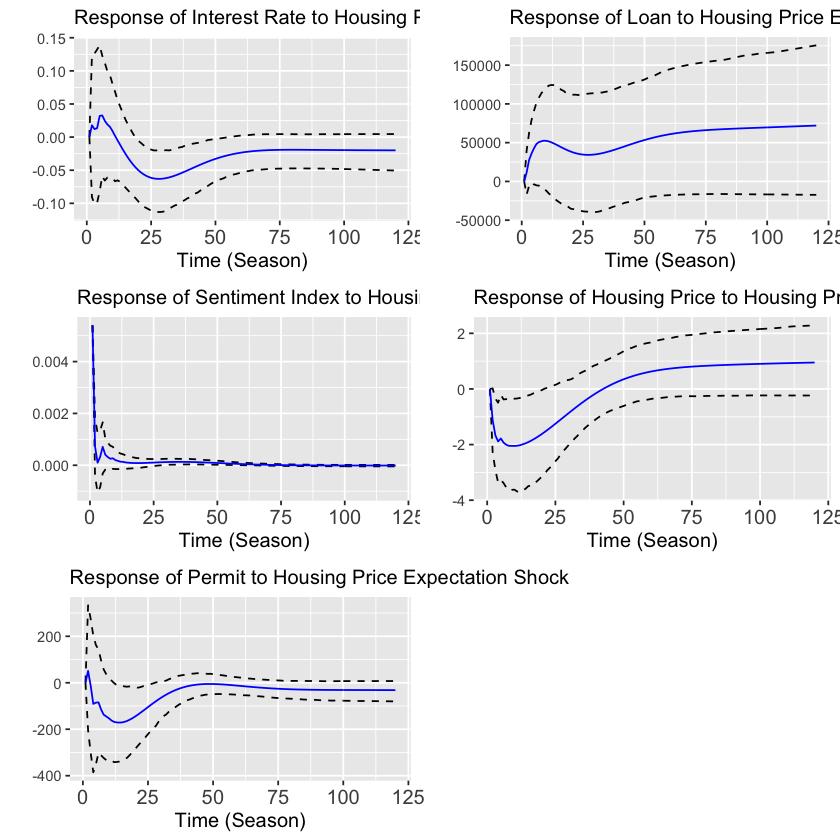

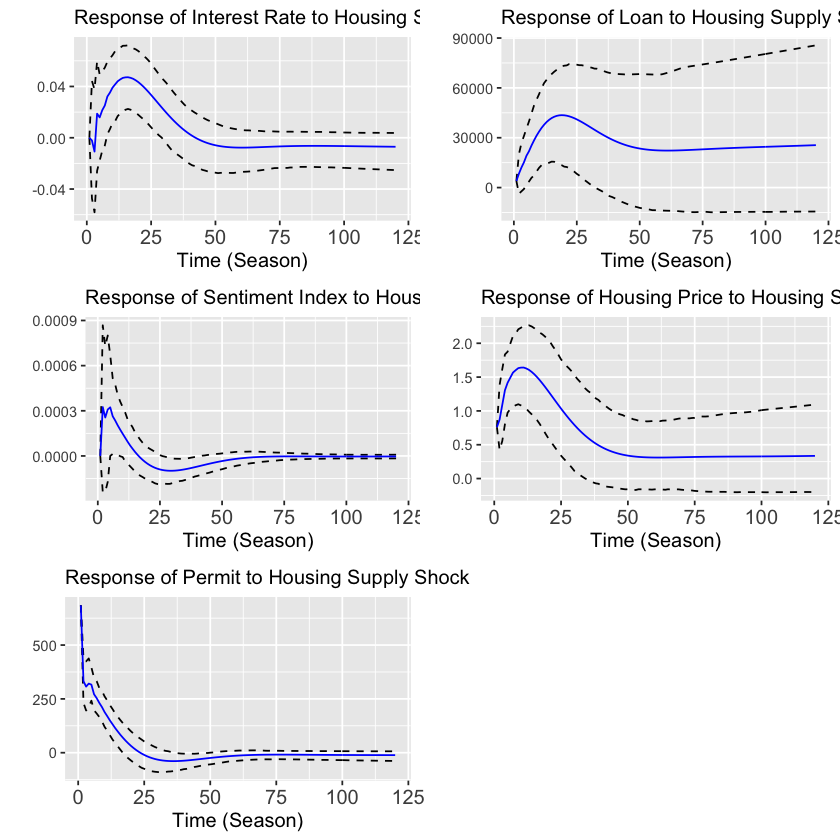

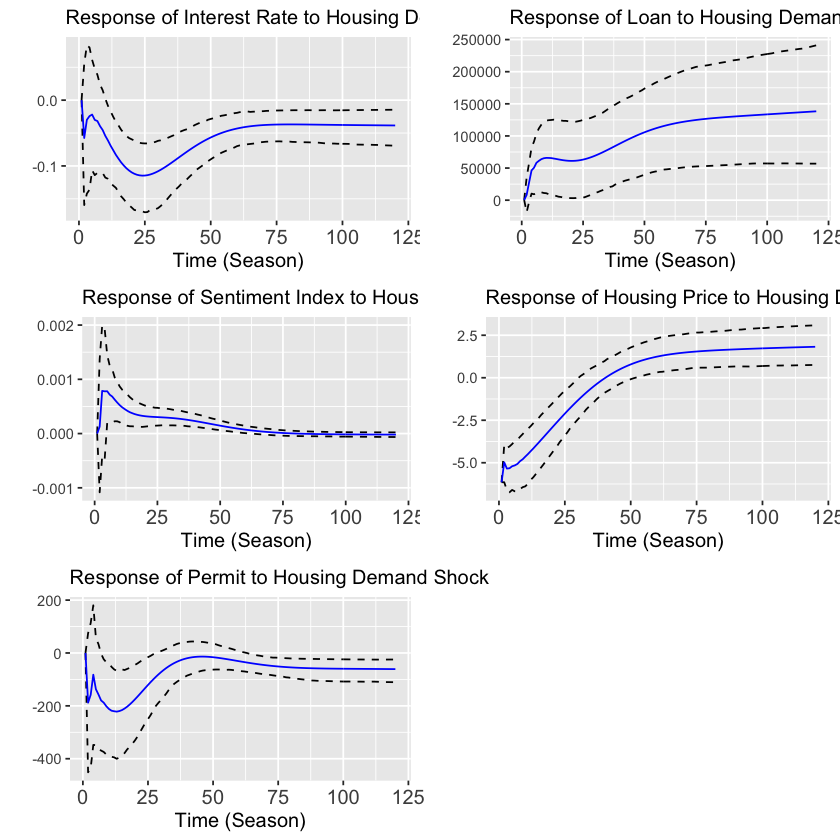

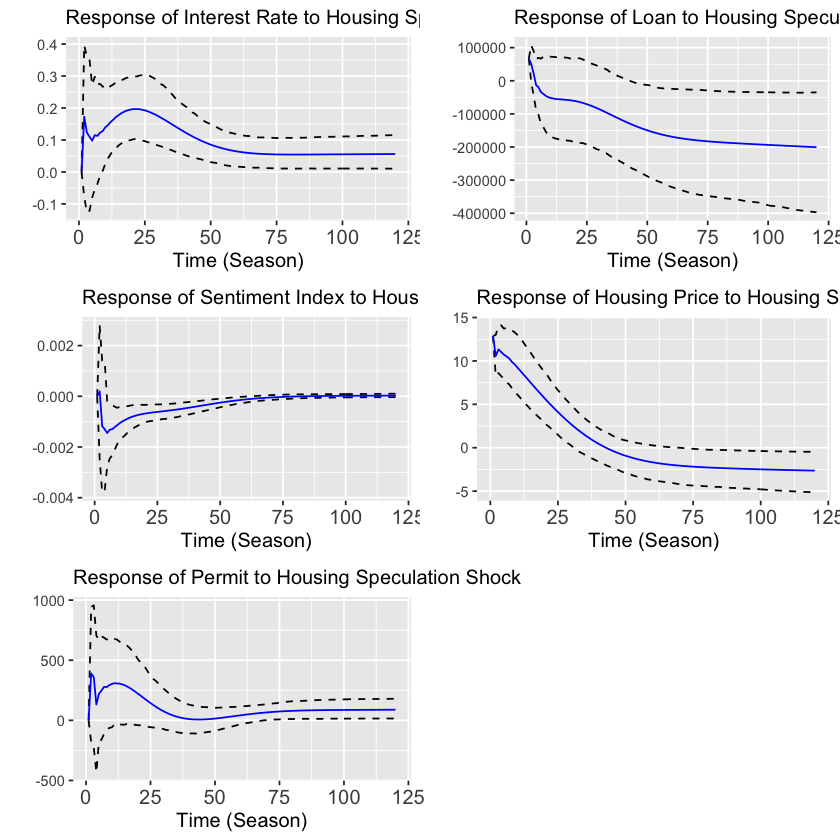

In [22]:
# For shock 1
multiplot(p1,p2,p3,p4,p5,
          cols = 2)
# For shock 2
multiplot(p6,p7,p8,p9,p10,
          cols = 2)
# For shock 3
multiplot(p11,p12,p13,p14,p15,
          cols = 2)
# For shock 4
multiplot(p16,p17,p18,p19,p20,
          cols = 2)
# For shock 5
multiplot(p21,p22,p23,p24,p25,
          cols = 2)

In [23]:
# save plot
# shock 1
ggsave(filename = "result/figure/SVAR_v5i2l4_IRF_shock1.png", 
       plot = multiplot(p1,p2,p3,p4,p5, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 2
ggsave(filename = "result/figure/SVAR_v5i2l4_IRF_shock2.png", 
       plot = multiplot(p6,p7,p8,p9,p10, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 3
ggsave(filename = "result/figure/SVAR_v5i2l4_IRF_shock3.png", 
       plot = multiplot(p11,p12,p13,p14,p15, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 4
ggsave(filename = "result/figure/SVAR_v5i2l4_IRF_shock4.png", 
       plot = multiplot(p16,p17,p18,p19,p20, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 5
ggsave(filename = "result/figure/SVAR_v5i2l4_IRF_shock5.png", 
       plot = multiplot(p21,p22,p23,p24,p25, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

## Variance Decomposition

In [24]:
# `ddTheta` 放已經估出來的IRF (至於要放怎樣穩定的還要再想)
# m表示對於第幾個變數的變異數分解（如第五個是對房價的變異數分解）
SVAR_AB_VarDecomp <- VAR.svardecomp.AB(m = 5, By, VAR.P,
                                       AMat, BMat, h=120,
                                       Const=TRUE, ddTheta = SVAR_AB_IRF)
tail(SVAR_AB_VarDecomp*100)

h=115,10.59363,1.512949,2.458976,20.78360,64.65084
h=116,10.66130,1.513603,2.452419,20.82383,64.54885
h=117,10.72864,1.514249,2.445916,20.86381,64.44738
h=118,10.79566,1.514886,2.439465,20.90353,64.34645
h=119,10.86236,1.515515,2.433065,20.94301,64.24605
h=120,10.92873,1.516136,2.426714,20.98224,64.14618


In [25]:
# table
SVAR_VD <- (SVAR_AB_VarDecomp*100) %>% as.tibble()
SVAR_VD <- SVAR_VD %>% filter(row_number(V1) %in% c(1,2,4,8,12,20,40,60,80,120)) %>%
    mutate(period = c(1,2,4,8,12,20,40,60,80,120)) %>%
    select(period = period,
           mp = V1,
           expectation = V2,
           hs = V3,
           hd = V4,
           sp = V5) %>%
    mutate(period = as.character(period),
           mp = round(mp, digits = 2),
           expectation = round(expectation, digits = 2),
           hs = round(hs, digits = 2),
           hd = round(hd, digits = 2),
           sp = round(sp, digits = 2))
SVAR_VD

period,mp,expectation,hs,hd,sp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00,0.00,0.28,18.57,81.15
2,0.01,0.06,0.29,18.83,80.82
4,0.13,0.12,0.47,18.64,80.64
8,0.41,0.47,0.81,18.71,79.60
12,0.73,0.83,1.15,18.69,78.60
20,1.44,1.35,1.77,18.31,77.13
40,3.81,1.56,2.77,17.48,74.38
60,6.15,1.50,2.88,18.18,71.30
80,7.99,1.49,2.73,19.19,68.60


In [26]:
tab_VD <- xtable(SVAR_VD, caption= "房價指數的變異數分解", align=c("c","c","c","c","c","c","c"))
print(tab_VD, include.rownames=FALSE)

% latex table generated in R 3.6.2 by xtable 1.8-4 package
% Sat Jan 30 21:29:58 2021
\begin{table}[ht]
\centering
\begin{tabular}{cccccc}
  \hline
period & mp & expectation & hs & hd & sp \\ 
  \hline
1 & 0.00 & 0.00 & 0.28 & 18.57 & 81.15 \\ 
  2 & 0.01 & 0.06 & 0.29 & 18.83 & 80.82 \\ 
  4 & 0.13 & 0.12 & 0.47 & 18.64 & 80.64 \\ 
  8 & 0.41 & 0.47 & 0.81 & 18.71 & 79.60 \\ 
  12 & 0.73 & 0.83 & 1.15 & 18.69 & 78.60 \\ 
  20 & 1.44 & 1.35 & 1.77 & 18.31 & 77.13 \\ 
  40 & 3.81 & 1.56 & 2.77 & 17.48 & 74.38 \\ 
  60 & 6.15 & 1.50 & 2.88 & 18.18 & 71.30 \\ 
  80 & 7.99 & 1.49 & 2.73 & 19.19 & 68.60 \\ 
  120 & 10.93 & 1.52 & 2.43 & 20.98 & 64.15 \\ 
   \hline
\end{tabular}
\caption{房價指數的變異數分解} 
\end{table}


In [27]:
print(tab_VD, file="result/table/SVAR_v5i2l4_VD.tex",
      include.rownames=FALSE,
      append=T, table.placement = "h",
      caption.placement="bottom", hline.after=seq(from=-1,to=nrow(tab_VD),by=1))

## Historical Decomposition

In [28]:
SVAR_AB_HistDecomp <- VAR.svarhist.AB(By, VAR.P, Amat, Bmat, CONST)
dim(SVAR_AB_HistDecomp)

[1] 119  25

In [29]:
#----- Base Project 估計 -----#
SVAR_AB_Hist.c0 = VAR.baseproject(By, VAR.P, CONST)
head(SVAR_AB_Hist.c0)
dim(SVAR_AB_Hist.c0)
dim(By)

1,7.180000,0.005097271,10465.00,1658483,98.1600
2,8.270000,0.015780528,17129.00,1728606,104.1600
3,7.766667,0.016126075,17332.00,1848549,106.6800
4,6.022667,0.018451218,20174.00,1965070,109.9900
,6.569042,0.017517447,17897.65,2110570,111.3490
,6.609205,0.016701628,20076.52,2294858,113.5949


[1] 119   5

[1] 119   5

In [30]:
# 實際時間序列與基本預測時間序列之偏離值
head(By-SVAR_AB_Hist.c0)

,interest_rate,Sentiment,permit,loan,hp
1,0.0000000,0.0000000000,0.000,0.000,0.000000
2,0.0000000,0.0000000000,0.000,0.000,0.000000
3,0.0000000,0.0000000000,0.000,0.000,0.000000
4,0.0000000,0.0000000000,0.000,0.000,0.000000
5,-0.1957088,-0.0043687939,1392.347,-1344.756,1.860992
6,1.1094620,0.0006696575,4635.480,-91734.335,4.225128


In [31]:
# 只有特定衝擊下的時間序列與基本預測時間序列之偏離值
## shock1: monetary policy shock
head(SVAR_AB_HistDecomp[,c(1,6,11,16,21)])

NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
-0.1957088,-0.0004502106,-105.8434,-1223.796,-0.01506548
1.1572607,0.0030367902,617.2281,1293.035,0.17531256


In [32]:
##左：baseline上 hp 的變化；右：shock1 對 hp 的衝擊
cbind((By-SVAR_AB_Hist.c0)[,5], 
      (SVAR_AB_HistDecomp[,c(1,6,11,16,21)])[,5])

1,0.000000,NA
2,0.000000,NA
3,0.000000,NA
4,0.000000,NA
5,1.860992,-0.01506548
6,4.225128,0.17531256
7,5.542659,-0.23833815
8,4.704711,-1.43633982
9,3.981116,-1.20342823
10,1.707900,-1.15199514
11,9.593927,-1.76179399


### 對「房價」的歷史分解：monetary policy shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



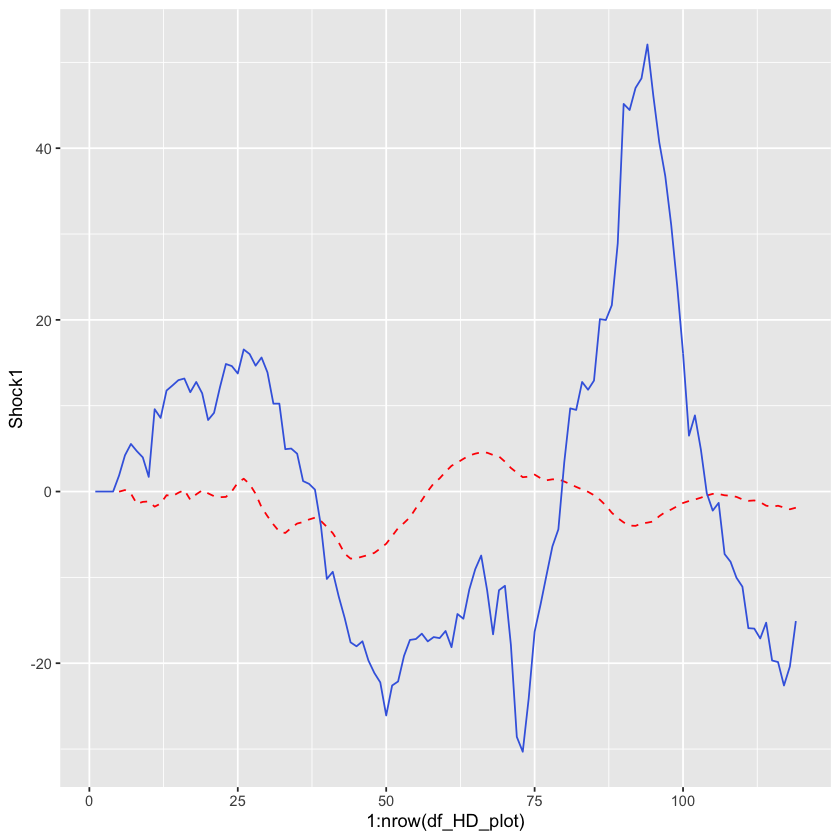

In [33]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(1,6,11,16,21)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock1")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock1), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')


### 對「房價」的歷史分解：housing price expectation shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



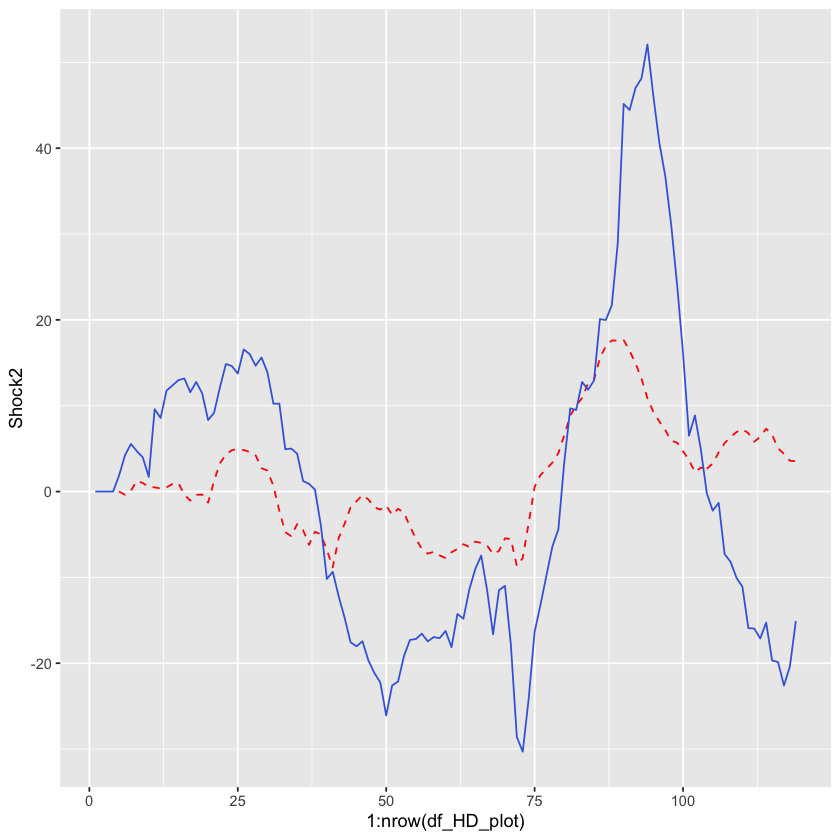

In [34]:
# ## shock2: housing price expectation shock
# SVAR_AB_HistDecomp[,c(2,7,12,17,22)]-SVAR_AB_Hist.c0
# ## baseline上 hp 的變化
# (By-SVAR_AB_Hist.c0)[,5]
# ## shock2 對 hp 的衝擊
# (SVAR_AB_HistDecomp[,c(2,7,12,17,22)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(2,7,12,17,22)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock2")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock2), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：supply shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



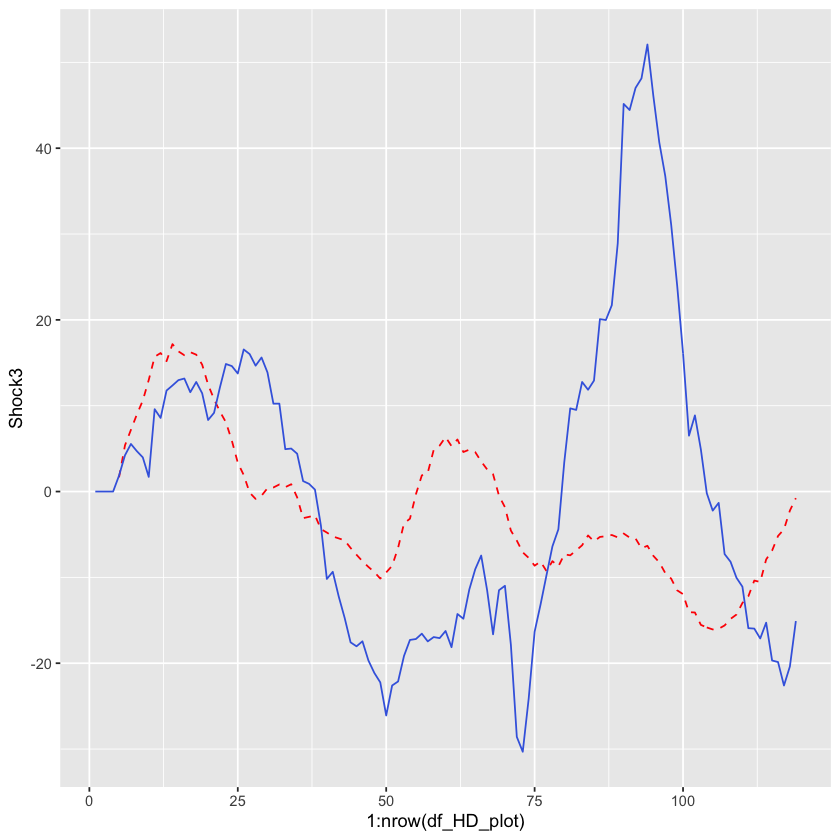

In [35]:
# ## shock3: supply shock
# SVAR_AB_HistDecomp[,c(3,8,13,18,23)]-SVAR_AB_Hist.c0
# ## baseline上 hp 的變化
# (By-SVAR_AB_Hist.c0)[,5]
# ## shock3 對 hp 的衝擊
# (SVAR_AB_HistDecomp[,c(3,8,13,18,23)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(3,8,13,18,23)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock3")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock3), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：demand shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



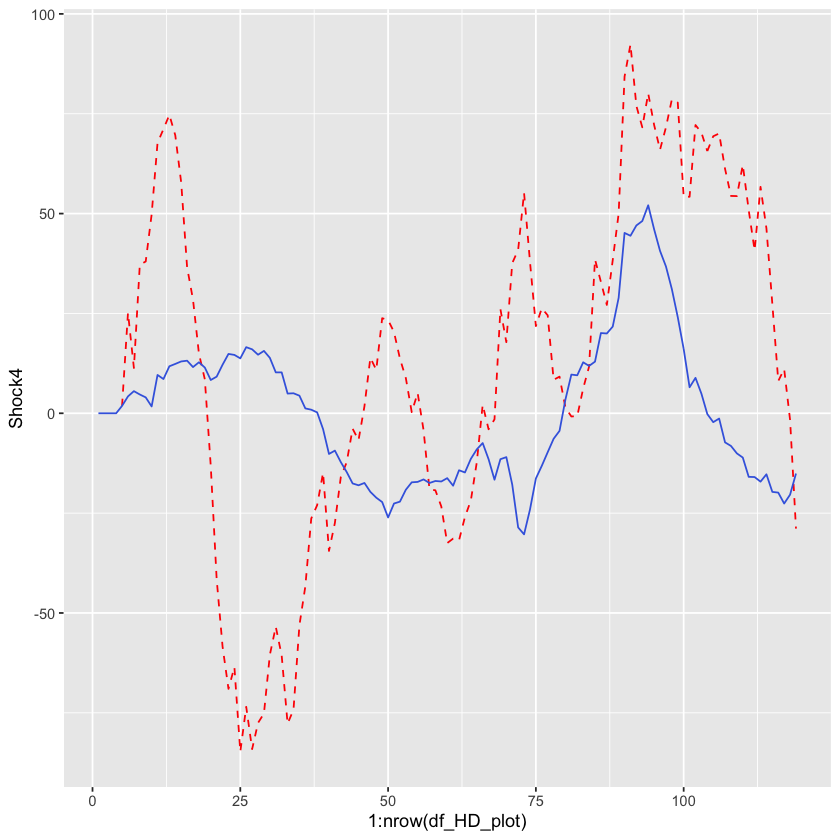

In [36]:
# ## shock4: demand shock
# SVAR_AB_HistDecomp[,c(4,9,14,19,24)]-SVAR_AB_Hist.c0
# ## baseline上 hp 的變化
# (By-SVAR_AB_Hist.c0)[,5]
# ## shock4 對 hp 的衝擊
# (SVAR_AB_HistDecomp[,c(4,9,14,19,24)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(4,9,14,19,24)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock4")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock4), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：housing speculation shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



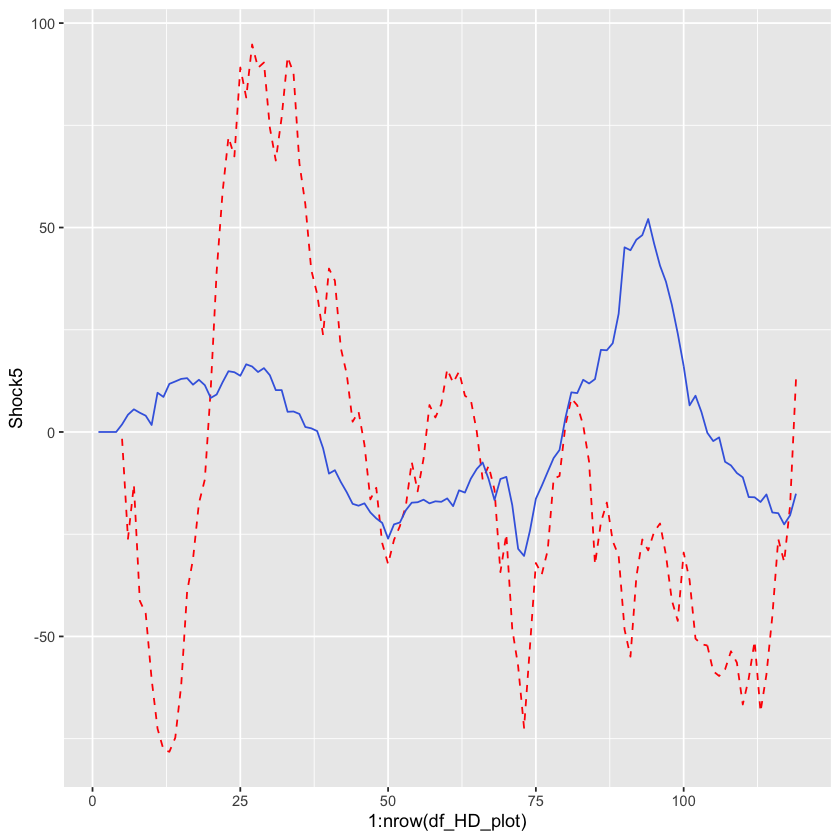

In [37]:
## shock5: housing speculation shock
#SVAR_AB_HistDecomp[,c(5,10,15,20,25)]-SVAR_AB_Hist.c0
## baseline上 hp 的變化
#(By-SVAR_AB_Hist.c0)[,5]
## shock5 對 hp 的衝擊
#(SVAR_AB_HistDecomp[,c(5,10,15,20,25)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(5,10,15,20,25)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock5")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock5), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### Table

In [38]:
t_label <- c()
year_label <- c()
season_label <- c()
year <- 1991
for(q in 1:119){
    if(q%%4==0){
        t_label <- c(t_label, paste0(year, "Q4", sep = ""))
        year_label <- c(year_label, year)
        season_label <- c(season_label, 4)
        year <- year+1
    }else{
        t_label <- c(t_label, paste0(year, "Q", q%%4, sep = ""))
        year_label <- c(year_label, year)
        season_label <- c(season_label, q%%4)
    }
}

In [39]:
df_HD <- bind_cols(t_label,
                   year_label,
                   season_label,
                   (By-SVAR_AB_Hist.c0)[,5],
                   SVAR_AB_HistDecomp[,21],
                   SVAR_AB_HistDecomp[,22],
                   SVAR_AB_HistDecomp[,23],
                   SVAR_AB_HistDecomp[,24],
                   SVAR_AB_HistDecomp[,25])
colnames(df_HD) <- c("Time", "Year", "Season", "BaseLine", "mp", "expectation", "hs", "hd", "sp")
tail(df_HD)

New names:
* NA -> ...1
* NA -> ...2
* NA -> ...3
* NA -> ...4
* NA -> ...5
* ...



Time,Year,Season,BaseLine,mp,expectation,hs,hd,sp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019Q2,2019,2,-15.27653,-1.646866,7.316619,-7.9102126,46.288325,-59.32439
2019Q3,2019,3,-19.68458,-1.768057,6.627597,-6.8787202,27.335860,-45.00127
2019Q4,2019,4,-19.86183,-1.653182,5.039901,-5.1765834,8.078772,-26.15074
2020Q1,2020,1,-22.59831,-1.863301,4.392323,-4.4014935,11.064975,-31.79081
2020Q2,2020,2,-20.37405,-2.067497,3.589220,-2.2119563,-1.682844,-18.00098
2020Q3,2020,3,-15.08912,-1.883136,3.533283,-0.7706156,-28.876903,12.90825


In [40]:
# 全樣本
HD_seq1 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
summarise(mp = median(mp),
          expectation = median(expectation),
          hs = median(hs),
          hd = median(hd),
          sp = median(sp))

# 房價持平期
HD_seq2 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Year<2003) %>%
summarise(mp = median(mp),
          expectation = median(expectation),
          hs = median(hs),
          hd = median(hd),
          sp = median(sp))

# 房價上升期
HD_seq3 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Year>=2003) %>%
summarise(mp = median(mp),
          expectation = median(expectation),
          hs = median(hs),
          hd = median(hd),
          sp = median(sp))

In [41]:
HD_seq <- bind_rows(HD_seq1, HD_seq2, HD_seq3)
HD.table <- bind_cols(c("全樣本(1991Q1-2020Q3)","房價持平期(1991Q1-2002Q4)","房價上升期(2003Q1-2020Q3)"), HD_seq)
colnames(HD.table) <- c("樣本期間", 
                        "Montary Policy Shock",
                        "Housing Price Expectation Shock",
                        "Housing Supply Shock",
                        "Housing Demand Shock",
                        "Housing Speculation Shock")
HD.table

New names:
* NA -> ...1



樣本期間,Montary Policy Shock,Housing Price Expectation Shock,Housing Supply Shock,Housing Demand Shock,Housing Speculation Shock
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
全樣本(1991Q1-2020Q3),-4.78908,19.460811,19.47709,8.259743,64.580579
房價持平期(1991Q1-2002Q4),-3.09062,6.766855,46.72386,5.946284,1.720756
房價上升期(2003Q1-2020Q3),-6.73787,25.532409,-11.36698,8.259743,72.091768


In [42]:
# 生出table
tab_HD <- xtable(HD.table, caption= "歷史分解下各衝擊的解釋力比率(%)", align=c("c","c","c","c","c","c","c"))
print(tab_HD, include.rownames=FALSE)

% latex table generated in R 3.6.2 by xtable 1.8-4 package
% Sat Jan 30 21:30:33 2021
\begin{table}[ht]
\centering
\begin{tabular}{cccccc}
  \hline
樣本期間 & Montary Policy Shock & Housing Price Expectation Shock & Housing Supply Shock & Housing Demand Shock & Housing Speculation Shock \\ 
  \hline
全樣本(1991Q1-2020Q3) & -4.79 & 19.46 & 19.48 & 8.26 & 64.58 \\ 
  房價持平期(1991Q1-2002Q4) & -3.09 & 6.77 & 46.72 & 5.95 & 1.72 \\ 
  房價上升期(2003Q1-2020Q3) & -6.74 & 25.53 & -11.37 & 8.26 & 72.09 \\ 
   \hline
\end{tabular}
\caption{歷史分解下各衝擊的解釋力比率(%)} 
\end{table}


In [43]:
print(tab_HD, include.rownames=FALSE,
      file="result/table/SVAR_SVAR_v5i2l4_HD.tex",
      append=T, table.placement = "h",
      caption.placement="bottom", hline.after=seq(from=-1,to=nrow(tab_HD),by=1))

### Save Plot

In [44]:
xlab <- lubridate::yq(df_HD$Time)

In [45]:
# plot 1
figure_HD.1 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = mp, color = "Monetary Policy Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Monetary Policy Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('royalblue','red'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 2: price expectation shock
figure_HD.2 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = expectation, color = "Housing Price Expectation Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Price Expectation Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 3: supply shock
figure_HD.3 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = hs, color = "Housing Supply Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Supply Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 4: demand shock
figure_HD.4 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = hd, color = "Housing Demand Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Demand Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())


# plot 5: sp
figure_HD.5 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = sp, color = "Housing Speculation Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Speculation Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

In [46]:
# save shock 1
ggsave(filename = "result/figure/SVAR_v5i2l4_HD_shock1.png", 
       plot = figure_HD.1,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 2
ggsave(filename = "result/figure/SVAR_v5i2l4_HD_shock2.png", 
       plot = figure_HD.2,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 3
ggsave(filename = "result/figure/SVAR_v5i2l4_HD_shock3.png", 
       plot = figure_HD.3,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 4
ggsave(filename = "result/figure/SVAR_v5i2l4_HD_shock4.png", 
       plot = figure_HD.4,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 5
ggsave(filename = "result/figure/SVAR_v5i2l4_HD_shock5.png", 
       plot = figure_HD.5,
       width = 15, height = 10, units = "cm",
       device = "png")